In [7]:
# Simple example using recurrent neural network to predict time series values

from __future__ import division, print_function, absolute_import

import tflearn
from tflearn.layers.normalization import batch_normalization
import numpy as np
import math
import matplotlib

# matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt

def shift(data, amount):
    data = data[:-amount]
    pad = amount
    return np.pad(data, pad, mode='constant', constant_values=np.nan)
#http://mourafiq.com/2016/05/15/predicting-sequences-using-rnn-in-tensorflow.html
# def sin_cos(x):
#     return pd.DataFrame(dict(a=np.sin(x), b=np.cos(x)), index=x)

# X, y = generate_data(sin_cos, np.linspace(0, 100, 10000), TIMESTEPS, seperate=False)
def gen_data(func, x, steps_of_history, steps_in_future):
    
    print('pre func x:', np.shape(x))
    x = func(x)
    print('post func x:', np.shape(x))
    seq = []
    next_val = []

    for i in range(0, len(x) - steps_of_history - steps_in_future, 1):
        seq.append(x[i: i + steps_of_history])
        next_val.append(x[i + steps_of_history + steps_in_future - 1])

    print('seq pre reshape:', np.shape(seq))
    seq = np.reshape(seq, [-1, steps_of_history, 1])
    next_val = np.reshape(next_val, [-1, 1])
    print('seq post reshape:', np.shape(seq))

    trainX = np.array(seq)
    trainY = np.array(next_val)
    return trainX, trainY


step_radians = 0.0001
steps_of_history = 500
steps_in_future = 10
index = 0

func = lambda x: x * np.sin(x**2)

x = np.arange(0, 5*math.pi, step_radians)

trainX, trainY = gen_data(func, x, steps_of_history, steps_in_future)

# Network building
net = tflearn.input_data(shape=[None, steps_of_history, 1])
net = tflearn.lstm(net, steps_of_history, dropout=(0.9,1.0), weights_init="xavier", return_seq=True)#tflearn.simple_rnn(net, n_units=32, return_seq=False)
net = tflearn.lstm(net, steps_of_history, dropout=(0.9,1.0), weights_init="xavier", return_seq=True)#tflearn.simple_rnn(net, n_units=32, return_seq=False)
net = tflearn.lstm(net, steps_of_history, dropout=(0.9,1.0), weights_init="xavier")#tflearn.simple_rnn(net, n_units=32, return_seq=False)
net = tflearn.fully_connected(net, 256, activation='linear')
net = tflearn.fully_connected(net, 1, activation='linear')
net = tflearn.regression(net, optimizer='sgd', loss='mean_square', learning_rate=0.5)

pre func x: (157080,)
post func x: (157080,)
seq pre reshape: (156570, 500)
seq post reshape: (156570, 500, 1)


In [10]:
# Training
model = tflearn.DNN(net, clip_gradients=0.5, tensorboard_verbose=0)
model.fit(trainX, trainY, n_epoch=1, validation_set=0.1, batch_size=64)

# Testing
test_x = np.arange(5*math.pi, 10*math.pi, step_radians)
testX, _ = gen_data(func, test_x, steps_of_history, 0)
print(np.shape(testX))

# Predict the future values
predictY = model.predict(testX)

print('y:', np.shape(predictY), predictY[0:10])

predictY = shift(np.array(predictY)[:,0], steps_of_history)
# print(predictY)

print ('x:', np.shape(x))
print('y:', np.shape(predictY), predictY[steps_of_history + steps_in_future +100:steps_of_history + steps_in_future + 110])

# Plot the results
plt.figure(figsize=(20,4))
plt.suptitle('Prediction')
plt.title('History='+str(steps_of_history)+', Future='+str(steps_in_future))
plt.plot(func(test_x), 'r-', label='Actual')
plt.plot(predictY, 'g--', label='Predicted')
plt.legend()
plt.savefig('sine.png')


IndexError: list index out of range

pre func x: (439823,)
post func x: (439823,)
seq pre reshape: (439323, 500)
seq post reshape: (439323, 500, 1)
(439323, 500, 1)
x: (157080,)


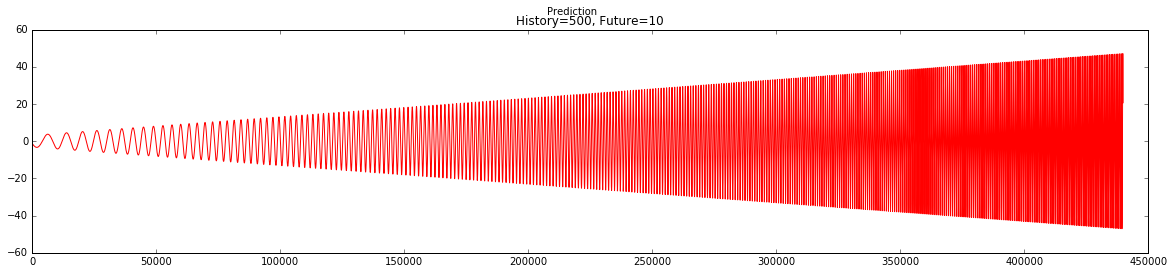

In [8]:
# Testing
test_x = np.arange(1*math.pi, 15*math.pi, step_radians)
testX, _ = gen_data(func, test_x, steps_of_history, 0)
print(np.shape(testX))

# print(predictY)

print ('x:', np.shape(x))

# Plot the results
plt.figure(figsize=(20,4))
plt.suptitle('Prediction')
plt.title('History='+str(steps_of_history)+', Future='+str(steps_in_future))
plt.plot(func(test_x), 'r-', label='Actual')
# plt.legend('boo')

##### 